In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
df = pd.read_csv("BostonHousing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


CRIM - уровень преступности на душу населения в разбивке по городам


ZN - доля жилой земли, зонированной для участков площадью более 25 000 кв. футов.


INDUS - доля акров, не связанных с розничной торговлей, в каждом городе.


CHAS - Фиктивная переменная Чарльз-Ривер (1, если тракт граничит с рекой; 0 в противном случае)


NOX - концентрация оксидов азота (частей на 10 миллионов)


RM - среднее количество комнат в жилом помещении


AGE - доля занимаемых владельцами квартир, построенных до 1940 года


DIS - взвешенные расстояния до пяти бостонских центров занятости


RAD - индекс доступности к радиальным магистралям


TAX - ставка налога на недвижимость по полной стоимости за 10 000 долларов


PTRATIO - соотношение учеников и учителей в разбивке по городам


B - 1000(Bk - 0,63)^2, где Bk - доля чернокожих в разбивке по городам


LSTAT - % более низкий статус населения


MEDV - Средняя стоимость домов, занимаемых владельцами, в 1000 долларах

In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

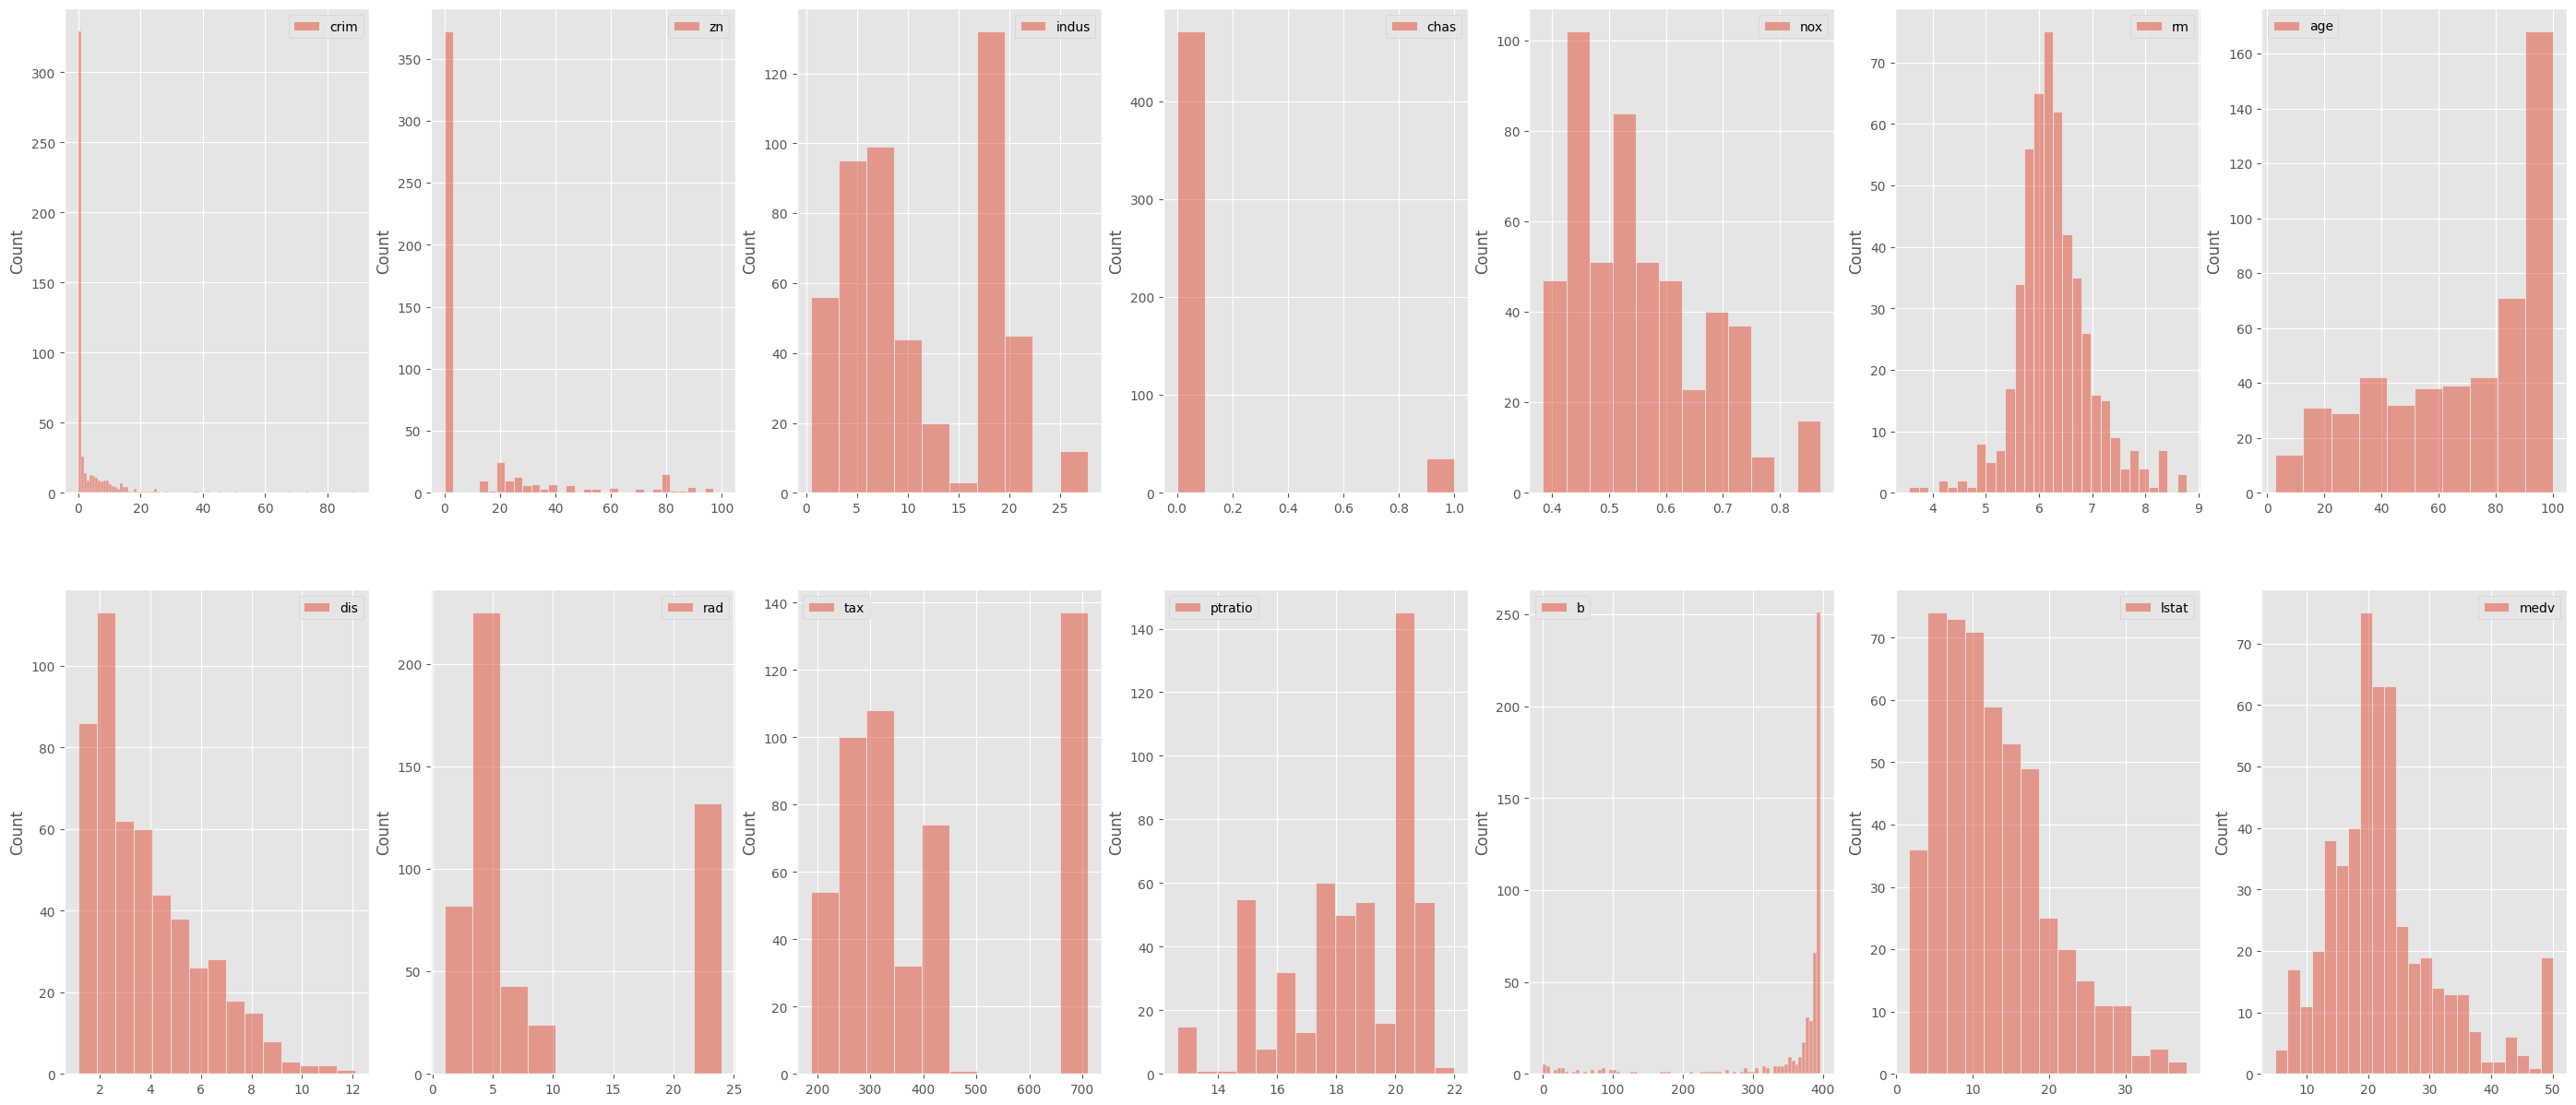

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(35, 15))
index = 0
axs = axs.flatten()
for i in df.items():
    sns.histplot(i, ax=axs[index])
    index += 1

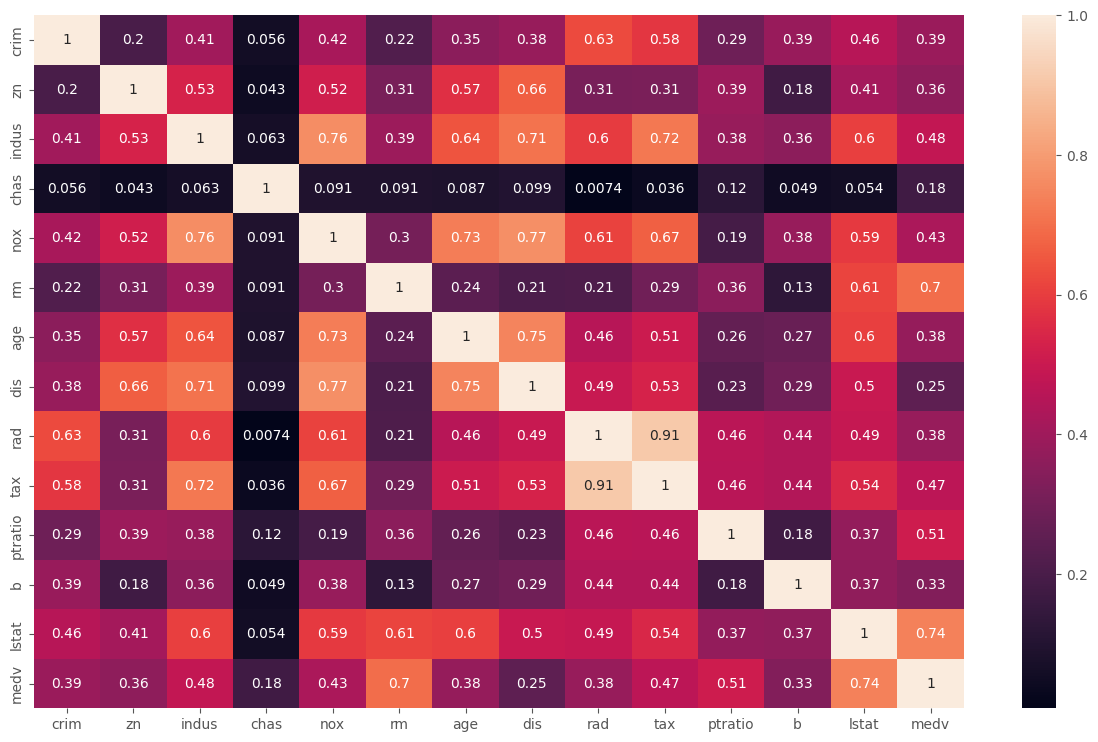

In [ ]:
plt.figure(figsize=(15,9))
ax = sns.heatmap(df.corr().abs(), annot=True)

отмечаем зависимость(ключевое medv):

medv - lstat(0.74)

medv - rm(0.7)

chas - является категориальным, так что его можно тоже рассмотреть

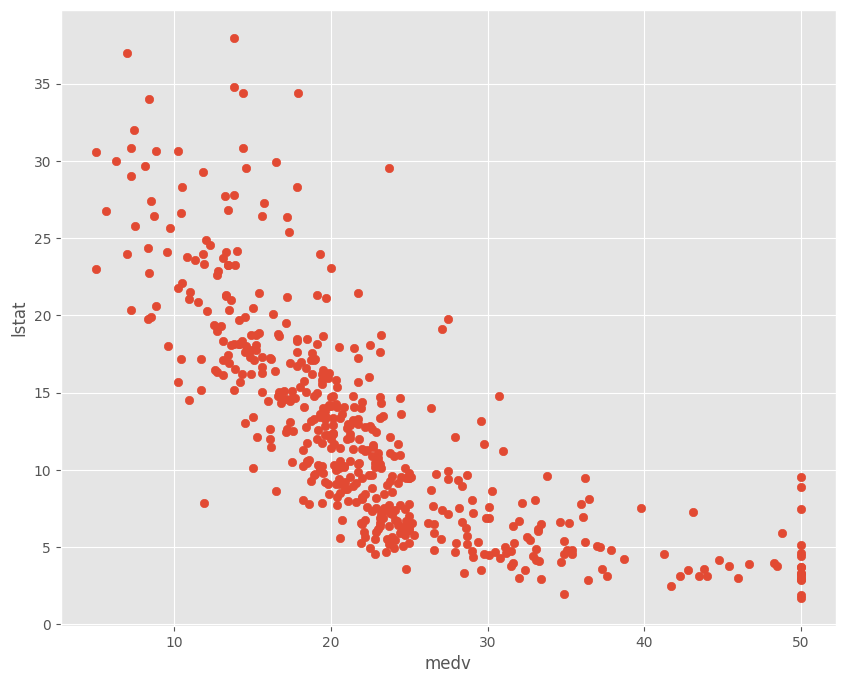

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter( df['medv'], df['lstat'])
plt.xlabel('medv')
plt.ylabel('lstat')
plt.show()

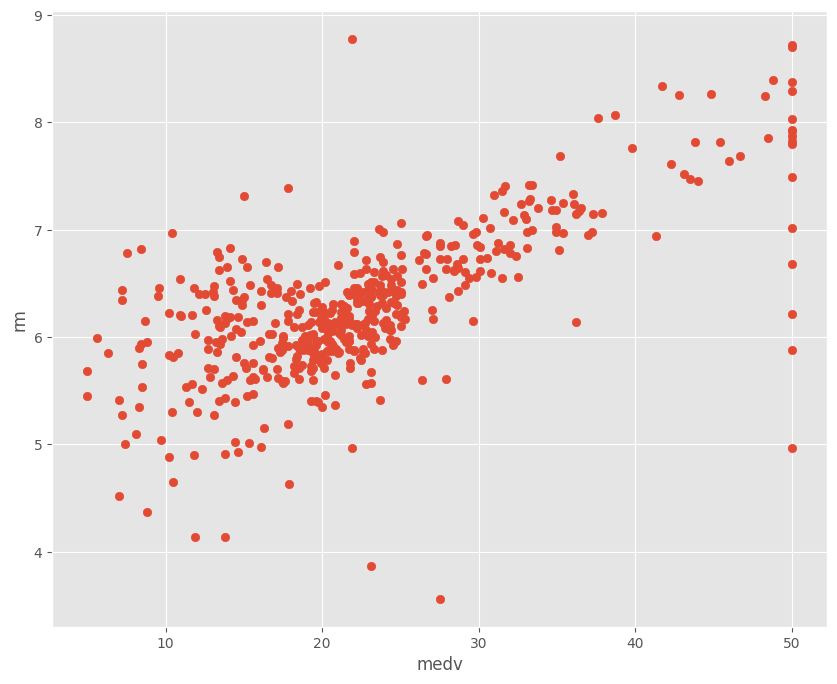

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter( df['medv'], df['rm'])
plt.xlabel('medv')
plt.ylabel('rm')
plt.show()

In [ ]:
df[['medv','chas']].groupby('chas').mean()

,medv
chas,
0,22.093843
1,28.440000


<Axes: xlabel='chas'>

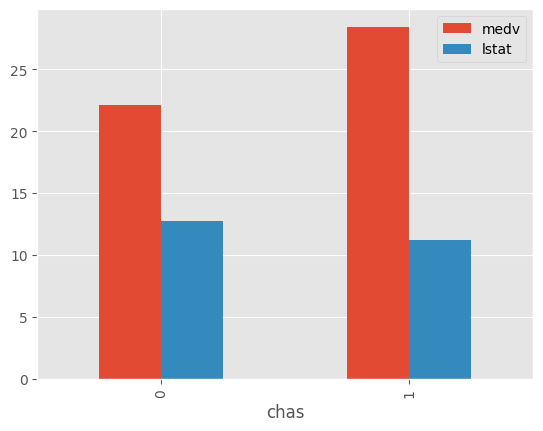

In [ ]:
df[['medv','chas','lstat']].groupby('chas').mean().plot.bar()


Вывод: средняя цена домов имела зависимость со средним количеством комнот(чем больше показатель, тем выше цена -> линейная зависимость), с показателем lstat(чем ниже, тем выше цена -> по экспоненциальной зависимоти) и с тем, ограничивает участок река Чарльз (цена выше у того, где участок ограничен)